## 그래프에 주석 처리하기

In [ ]:
# COVID 하락 시작일: "2020-03-01"

# COVID 회복 시작일: "2020-09-01"

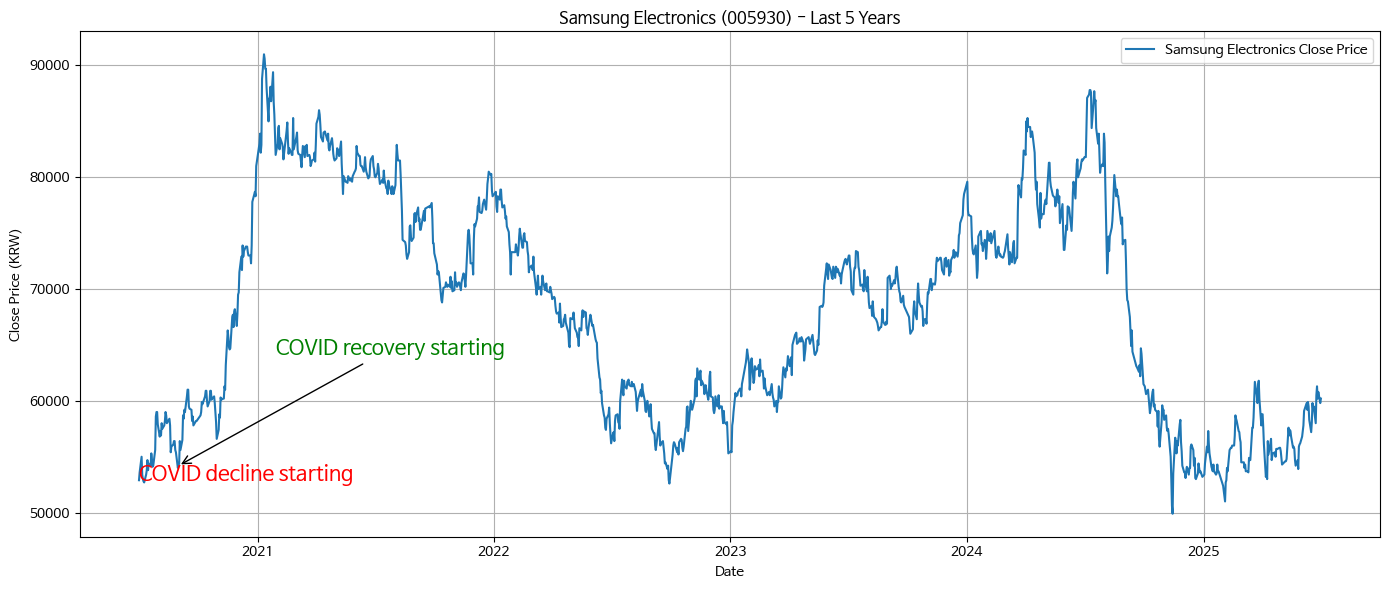

In [9]:
from pykrx import stock
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas as pd

# 1. 데이터 가져오기: 최근 5년간 삼성전자 주가
end_date = datetime.today().strftime('%Y%m%d')
start_date = (datetime.today() - timedelta(days=5*365)).strftime('%Y%m%d')

df = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")

# 2. 명시적으로 주석을 표시할 날짜 설정
selected_date_1 = pd.to_datetime("2020-03-01")  # COVID 하락 시작
selected_date_2 = pd.to_datetime("2020-09-01")  # COVID 회복 시작

# 3. 실제 거래일에 맞게 보정 (가장 가까운 날짜 선택)
selected_date_1 = df.index[df.index.get_indexer([selected_date_1], method='nearest')[0]]
selected_price_1 = df.loc[selected_date_1, '종가']

selected_date_2 = df.index[df.index.get_indexer([selected_date_2], method='nearest')[0]]
selected_price_2 = df.loc[selected_date_2, '종가']

# 4. 그래프 시각화
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['종가'], label='Samsung Electronics Close Price')
plt.title('Samsung Electronics (005930) - Last 5 Years')
plt.xlabel('Date')
plt.ylabel('Close Price (KRW)')
plt.grid(True)
plt.legend()

# 5. 첫 번째 주석: COVID 하락
plt.text(
    selected_date_1,
    selected_price_1,
    "COVID decline starting",
    fontsize=15,
    color='red'
)

# 6. 두 번째 주석: COVID 회복
plt.annotate(
    "COVID recovery starting",
    xy=(selected_date_2, selected_price_2),
    xytext=(selected_date_2 + timedelta(days=150), selected_price_2 + 10000),
    arrowprops=dict(arrowstyle='->'),
    fontsize=15,
    color='green'
)

plt.tight_layout()
plt.show()


In [ ]:
전체 코드: COVID 하락 및 회복 시점 주석 포함

C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\pykrx\__init__.py:4: UserWarning:

pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.



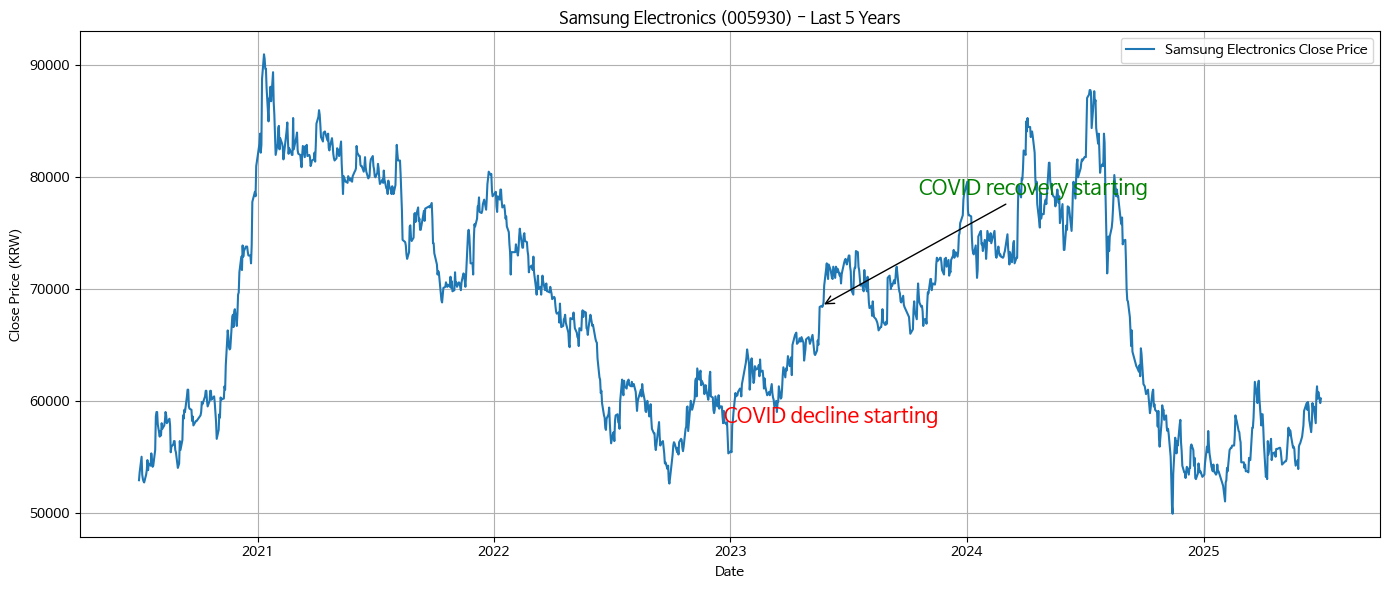

In [8]:
from pykrx import stock
import matplotlib.pyplot as plt

# 최근 5년간 날짜
end_date = datetime.today().strftime('%Y%m%d')
start_date = (datetime.today() - timedelta(days=5*365)).strftime('%Y%m%d')

# 삼성전자 일별 종가 데이터 가져오기
df = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")

# 중간 및 회복 주석용 날짜 계산
mid_index = len(df) // 2
selected_date_1 = df.index[mid_index]
selected_price_1 = df.loc[selected_date_1, '종가']

selected_date_2 = df.index[mid_index + 100]
selected_price_2 = df.loc[selected_date_2, '종가']

# 그래프 그리기
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['종가'], label='Samsung Electronics Close Price')
plt.title('Samsung Electronics (005930) - Last 5 Years')
plt.xlabel('Date')
plt.ylabel('Close Price (KRW)')
plt.grid(True)
plt.legend()

# 첫 번째 주석: COVID decline
plt.text(selected_date_1, selected_price_1, "COVID decline starting", fontsize=15, color='red')

# 두 번째 주석: COVID recovery
plt.annotate(
    "COVID recovery starting",
    xy=(selected_date_2, selected_price_2),
    xytext=(selected_date_2 + timedelta(days=150), selected_price_2 + 10000),
    arrowprops=dict(arrowstyle='->'),
    fontsize=15,
    color='green'
)

plt.tight_layout()
plt.show()


## 캔들스틱 차트(candlestick chart) 

In [ ]:
# type='candle'은 캔들스틱 차트를 의미합니다.

# mav=(5, 20, 60)은 5일, 20일, 60일 이동평균선을 함께 표시합니다.

# volume=True는 거래량을 하단에 표시합니다.

# style='charles' 외에도 nightclouds, mike, yahoo 등 다양한 스타일을 사용할 수 있습니다.

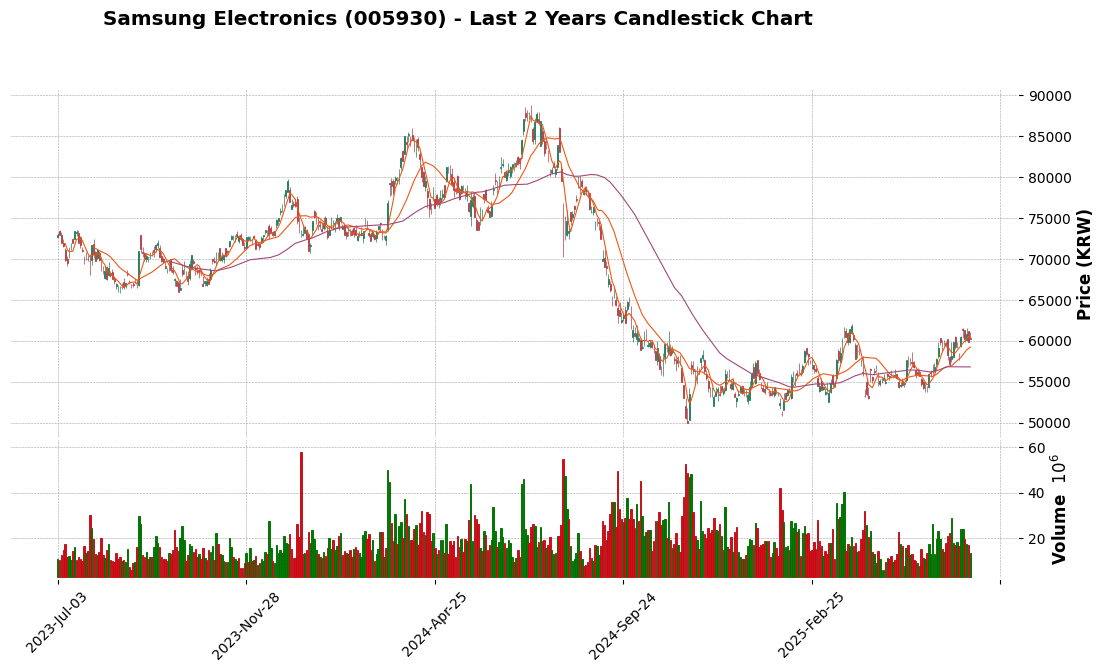

In [12]:
from pykrx import stock
import pandas as pd
import mplfinance as mpf
from datetime import datetime, timedelta

# 1. 날짜 설정 (최근 2년)
end_date = datetime.today().strftime('%Y%m%d')
start_date = (datetime.today() - timedelta(days=2*365)).strftime('%Y%m%d')

# 2. 삼성전자(005930) 일별 시세 데이터 가져오기
df = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")

# 3. 인덱스를 datetime 형태로 변환 (mplfinance 요구사항 충족)
df.index = pd.to_datetime(df.index)

# 4. 컬럼 이름 변경 (mplfinance 양식에 맞춤)
df.rename(columns={
    '시가': 'Open',
    '고가': 'High',
    '저가': 'Low',
    '종가': 'Close',
    '거래량': 'Volume'
}, inplace=True)

# 5. 캔들스틱 차트 그리기
mpf.plot(
    df,
    type='candle',
    style='charles',          # 다양한 스타일 선택 가능 (charles, nightclouds 등)
    title='Samsung Electronics (005930) - Last 2 Years Candlestick Chart',
    ylabel='Price (KRW)',
    volume=True,              # 거래량 표시 여부
    mav=(5, 20, 60),          # 이동평균선 설정
    figsize=(14, 7)
)


## 5일, 20일, 60일 이동평균선을 계산

In [ ]:
# 검은색 선: 실제 종가
# 파란색 선: 5일 이동평균 (단기 추세)
# 초록색 선: 20일 이동평균 (중기 추세)
# 빨간색 선: 60일 이동평균 (장기 추세)

C:\Users\JYB\AppData\Local\Temp\ipykernel_25072\1780955287.py:33: UserWarning:

Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.

C:\Users\JYB\AppData\Local\Temp\ipykernel_25072\1780955287.py:33: UserWarning:

Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.

C:\Users\JYB\AppData\Local\Temp\ipykernel_25072\1780955287.py:33: UserWarning:

Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.

C:\Users\JYB\AppData\Local\Temp\ipykernel_25072\1780955287.py:33: UserWarning:

Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.

C:\Users\JYB\AppData\Local\Temp\ipykernel_25072\1780955287.py:33: UserWarning:

Glyph 49340 (\N{HANGUL SYLLABLE SAM}) missing from current font.

C:\Users\JYB\AppData\Local\Temp\ipykernel_25072\1780955287.py:33: UserWarning:

Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.

C:\Users\JYB\AppData\Local\Temp\ipykernel_25072\1780955287.py:33: UserWarning:

Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missi

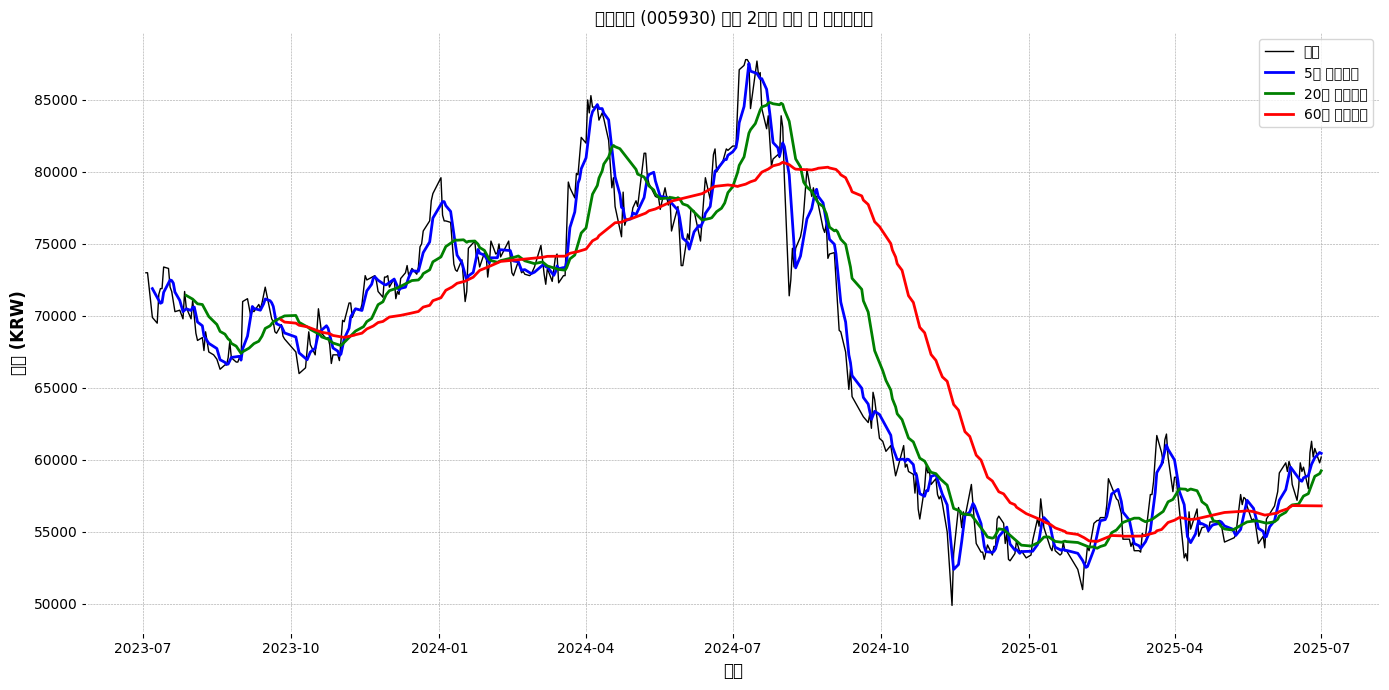

In [14]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta



# 1. 날짜 범위 설정 (최근 2년)
end_date = datetime.today().strftime('%Y%m%d')
start_date = (datetime.today() - timedelta(days=2*365)).strftime('%Y%m%d')

# 2. 삼성전자(005930) 일별 시세 데이터 가져오기
df = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")

# 3. 날짜 인덱스를 datetime 형태로 변환
df.index = pd.to_datetime(df.index)

# 4. 이동평균선 계산 (5일, 20일, 60일)
df['MA5'] = df['종가'].rolling(window=5).mean()
df['MA20'] = df['종가'].rolling(window=20).mean()
df['MA60'] = df['종가'].rolling(window=60).mean()

# 5. 시각화
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['종가'], label='종가', color='black', linewidth=1)
plt.plot(df.index, df['MA5'], label='5일 이동평균', color='blue')
plt.plot(df.index, df['MA20'], label='20일 이동평균', color='green')
plt.plot(df.index, df['MA60'], label='60일 이동평균', color='red')

plt.title('삼성전자 (005930) 최근 2년간 주가 및 이동평균선')
plt.xlabel('날짜')
plt.ylabel('주가 (KRW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
